In [1]:
%matplotlib inline

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA

In [3]:
df_twitter = pd.read_csv('data/twitter_training.csv', header=None)

In [4]:
df_twitter.columns = ['tweet_id', 'entity', 'sentiment', 'content']

In [5]:
df_twitter.describe()

,tweet_id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df_twitter.tweet_id.nunique()

12447

In [8]:
df_twitter.drop_duplicates()

,tweet_id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
df = df_twitter

In [10]:
with open('data/twitter_training.csv', 'r', encoding='utf-8') as file:
    print(file.read()[:300])



2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2401,Borderlands,Positive,"im coming on borderlands and i w


In [11]:
df.content.str.len().sort_values(ascending=False)

70940    957.0
28994    727.0
3098     692.0
18128    692.0
36308    692.0
         ...  
73972      NaN
73973      NaN
74421      NaN
74422      NaN
74423      NaN
Name: content, Length: 74682, dtype: float64

In [12]:
df.loc[70940, 'content']

'The event dedicated to Victory Day in the Great Patriotic War was held as part of the celebration of the 70th anniversary of Victory in the Great Patriotic War of 1941-1945, which was attended by veterans of the Great Patriotic War, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home'

In [13]:
df[df.content.isna()]

,tweet_id,entity,sentiment,content
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [14]:
df = df.dropna()

In [15]:
df.shape

(73996, 4)

In [16]:
df.content.str.len().sort_values(ascending=False)

70940    957
28994    727
3098     692
18128    692
36308    692
        ... 
39666      1
51983      1
55494      1
29339      1
69402      1
Name: content, Length: 73996, dtype: int64

In [17]:
df[df.content.str.len() <= 3]

,tweet_id,entity,sentiment,content
11,2402,Borderlands,Positive,was
53,2409,Borderlands,Neutral,all
191,2432,Borderlands,Positive,why
203,2434,Borderlands,Negative,I
389,2465,Borderlands,Irrelevant,is
...,...,...,...,...
74393,9148,Nvidia,Neutral,the
74411,9151,Nvidia,Positive,to
74418,9154,Nvidia,Positive,
74507,9171,Nvidia,Neutral,You


Since the tweets are based on sentiment, we group by sentiment

In [18]:
for sentiment, group_data in df.groupby('sentiment'):
    print(sentiment, group_data.content.str.len().median())

Irrelevant 93.0
Negative 91.0
Neutral 105.0
Positive 74.0


In [19]:
df.loc[0].content

'im getting on borderlands and i will murder you all ,'

In [20]:
Counter(df.loc[0].content)

Counter({' ': 10,
         'l': 5,
         'i': 4,
         'n': 4,
         'r': 4,
         'd': 4,
         'e': 3,
         'o': 3,
         'a': 3,
         'm': 2,
         'g': 2,
         't': 2,
         'u': 2,
         'b': 1,
         's': 1,
         'w': 1,
         'y': 1,
         ',': 1})

In [21]:
all_text = ' '.join(df.content.ravel())

C:\Users\Master\AppData\Local\Temp\ipykernel_13464\3218745954.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  all_text = ' '.join(df.content.ravel())


In [22]:
Counter(all_text)

Counter({' ': 1435996,
         'e': 645445,
         't': 495077,
         'o': 473359,
         'a': 459770,
         'n': 382395,
         'i': 378497,
         's': 352664,
         'r': 307248,
         'l': 250954,
         'h': 245582,
         'd': 200985,
         '.': 181075,
         'u': 167637,
         'm': 166695,
         'c': 165828,
         'y': 142591,
         'g': 141430,
         'p': 121339,
         'f': 112150,
         'w': 109137,
         'b': 92905,
         'k': 70703,
         'v': 66659,
         'I': 56573,
         'T': 41011,
         'A': 40142,
         'S': 36064,
         '/': 34279,
         ',': 32037,
         '!': 29426,
         '@': 28914,
         'E': 27906,
         'R': 27027,
         'O': 26915,
         'C': 24388,
         'G': 24136,
         'N': 23321,
         '2': 22155,
         'M': 21996,
         'D': 21916,
         "'": 21852,
         'B': 21473,
         '0': 21412,
         'P': 21144,
         'F': 20629,
         'L'

In [23]:
Counter(all_text.lower())

Counter({' ': 1435996,
         'e': 673351,
         't': 536088,
         'o': 500274,
         'a': 499912,
         'i': 435070,
         'n': 405716,
         's': 388728,
         'r': 334275,
         'l': 270617,
         'h': 264166,
         'd': 222901,
         'c': 190216,
         'm': 188691,
         '.': 181075,
         'u': 181008,
         'g': 165566,
         'y': 153245,
         'p': 142483,
         'f': 132779,
         'w': 128290,
         'b': 114378,
         'k': 80140,
         'v': 76885,
         '/': 34279,
         ',': 32037,
         '!': 29426,
         '@': 28914,
         'x': 24664,
         '2': 22155,
         "'": 21852,
         '0': 21412,
         'j': 21285,
         'z': 16576,
         '1': 15421,
         '-': 14175,
         '?': 13284,
         ':': 10528,
         '3': 9948,
         '’': 9342,
         '5': 9092,
         '4': 8177,
         'q': 7180,
         '6': 6845,
         '7': 6486,
         '9': 6074,
         '"': 5489,

In [24]:
frequencies = Counter(all_text.lower()).most_common(20)

In [25]:
frequencies

[(' ', 1435996),
 ('e', 673351),
 ('t', 536088),
 ('o', 500274),
 ('a', 499912),
 ('i', 435070),
 ('n', 405716),
 ('s', 388728),
 ('r', 334275),
 ('l', 270617),
 ('h', 264166),
 ('d', 222901),
 ('c', 190216),
 ('m', 188691),
 ('.', 181075),
 ('u', 181008),
 ('g', 165566),
 ('y', 153245),
 ('p', 142483),
 ('f', 132779)]

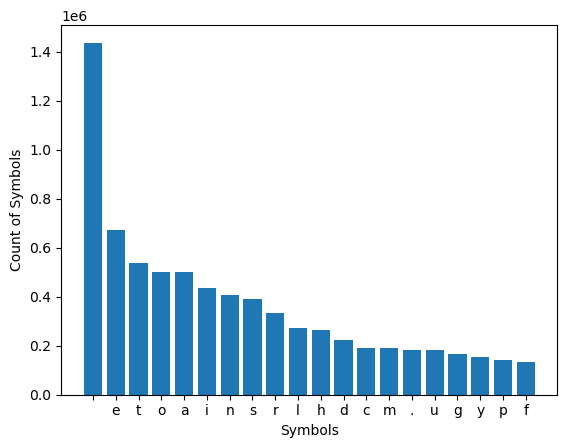

In [26]:
plt.bar([sym for sym, freq in frequencies], [freq for sym, freq in frequencies])
plt.ylabel('Count of Symbols')
plt.xlabel('Symbols')
plt.show()

In [27]:
words = all_text.split(' ')

In [28]:
Counter(words)

Counter({'the': 38242,
         'to': 27711,
         'I': 25184,
         'and': 24646,
         'a': 21849,
         'of': 18621,
         'is': 16472,
         'for': 14708,
         '/': 14655,
         'in': 14081,
         '': 13526,
         '@': 11081,
         'on': 11068,
         'this': 10534,
         '.': 10193,
         'my': 10120,
         'it': 9649,
         'you': 9466,
         'that': 9023,
         'with': 8286,
         'have': 6250,
         'so': 5993,
         'be': 5721,
         'game': 5696,
         'just': 5679,
         'are': 5526,
         'but': 5524,
         'not': 5382,
         'me': 5360,
         'was': 5138,
         'The': 5005,
         'at': 4699,
         '-': 4650,
         'all': 4561,
         'like': 4318,
         'from': 4067,
         'your': 3786,
         'out': 3747,
         'i': 3731,
         'get': 3517,
         'has': 3514,
         'as': 3410,
         'about': 3292,
         '2': 3097,
         'an': 3050,
         '&': 3

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
df['words'] = df.content.str.split('\\s+') # tokenization

C:\Users\Master\AppData\Local\Temp\ipykernel_13464\703932792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df.content.str.split('\\s+') # tokenization


In [32]:
df

,tweet_id,entity,sentiment,content,words
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m..."
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[I, am, coming, to, the, borders, and, I, will..."
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k..."
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu..."
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, 2, and, i, will..."
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,"[Just, realized, that, the, Windows, partition..."
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,"[Just, realized, that, my, Mac, window, partit..."
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,"[Just, realized, the, windows, partition, of, ..."
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,"[Just, realized, between, the, windows, partit..."


In [33]:
df.words.apply(lambda x: len(x)).sort_values(ascending=False)

1826     198
32186    198
43712    198
10454    198
68624    194
        ... 
16535      1
35418      1
61169      1
69474      1
59351      1
Name: words, Length: 73996, dtype: int64

In [34]:
df[df.content.str.contains('happy')]

,tweet_id,entity,sentiment,content,words
233,2439,Borderlands,Positive,I got to play Jackson 2 with his entire polycu...,"[I, got, to, play, Jackson, 2, with, his, enti..."
385,2465,Borderlands,Irrelevant,Pretty happy with it! I made these sub-badges ...,"[Pretty, happy, with, it!, I, made, these, sub..."
394,2466,Borderlands,Positive,Now I am happy here... With Samsung that is fu...,"[Now, I, am, happy, here..., With, Samsung, th..."
570,2499,Borderlands,Neutral,i kno borderlands handled zer0 being nonbinary...,"[i, kno, borderlands, handled, zer0, being, no..."
571,2499,Borderlands,Neutral,i kno borderlands handling zer0 being nonbinar...,"[i, kno, borderlands, handling, zer0, being, n..."
...,...,...,...,...,...
73192,8938,Nvidia,Negative,So that some GeForce Networks RTX 3080 pics le...,"[So, that, some, GeForce, Networks, RTX, 3080,..."
73193,8938,Nvidia,Negative,"So first GeForce RTX 3080 pics leaked, that so...","[So, first, GeForce, RTX, 3080, pics, leaked,,..."
73405,8974,Nvidia,Positive,"Fucking W, I was happy when the new graphics c...","[Fucking, W,, I, was, happy, when, the, new, g..."
74109,9097,Nvidia,Neutral,Nvidia RTX 3080 cards are selling @ thousands ...,"[Nvidia, RTX, 3080, cards, are, selling, @, th..."


In [35]:
df[df.content.str.contains('happy')]

,tweet_id,entity,sentiment,content,words
233,2439,Borderlands,Positive,I got to play Jackson 2 with his entire polycu...,"[I, got, to, play, Jackson, 2, with, his, enti..."
385,2465,Borderlands,Irrelevant,Pretty happy with it! I made these sub-badges ...,"[Pretty, happy, with, it!, I, made, these, sub..."
394,2466,Borderlands,Positive,Now I am happy here... With Samsung that is fu...,"[Now, I, am, happy, here..., With, Samsung, th..."
570,2499,Borderlands,Neutral,i kno borderlands handled zer0 being nonbinary...,"[i, kno, borderlands, handled, zer0, being, no..."
571,2499,Borderlands,Neutral,i kno borderlands handling zer0 being nonbinar...,"[i, kno, borderlands, handling, zer0, being, n..."
...,...,...,...,...,...
73192,8938,Nvidia,Negative,So that some GeForce Networks RTX 3080 pics le...,"[So, that, some, GeForce, Networks, RTX, 3080,..."
73193,8938,Nvidia,Negative,"So first GeForce RTX 3080 pics leaked, that so...","[So, first, GeForce, RTX, 3080, pics, leaked,,..."
73405,8974,Nvidia,Positive,"Fucking W, I was happy when the new graphics c...","[Fucking, W,, I, was, happy, when, the, new, g..."
74109,9097,Nvidia,Neutral,Nvidia RTX 3080 cards are selling @ thousands ...,"[Nvidia, RTX, 3080, cards, are, selling, @, th..."


In [36]:
df[df.content.str.contains('happy', case=False)].sentiment.value_counts()

sentiment
Positive      531
Neutral       281
Irrelevant    252
Negative      121
Name: count, dtype: int64

In [37]:
df[
    (df.content.str.contains('happy', case=False)) &
    (df.sentiment == 'Negative')
]

,tweet_id,entity,sentiment,content,words
2128,2772,Borderlands,Negative,Saw ran an ad for the new borderlands dlc s st...,"[Saw, ran, an, ad, for, the, new, borderlands,..."
2304,1604,CallOfDutyBlackopsColdWar,Negative,SO HAPPY ABOUT THIS .,"[SO, HAPPY, ABOUT, THIS, ., ]"
2305,1604,CallOfDutyBlackopsColdWar,Negative,SO HAPPY FOR THAT.,"[SO, HAPPY, FOR, THAT.]"
2306,1604,CallOfDutyBlackopsColdWar,Negative,So HAPPY ABOUT THIS.,"[So, HAPPY, ABOUT, THIS.]"
2307,1604,CallOfDutyBlackopsColdWar,Negative,SO HAPPY ABOUT THIS RELEASE,"[SO, HAPPY, ABOUT, THIS, RELEASE]"
...,...,...,...,...,...
73189,8938,Nvidia,Negative,So some pictures of the GeForce RTX 3080 have ...,"[So, some, pictures, of, the, GeForce, RTX, 30..."
73190,8938,Nvidia,Negative,So some photos of the GeForce X 3080 have leak...,"[So, some, photos, of, the, GeForce, X, 3080, ..."
73191,8938,Nvidia,Negative,"So the GeForce RTX 3080 pics leaked, and some ...","[So, the, GeForce, RTX, 3080, pics, leaked,, a..."
73192,8938,Nvidia,Negative,So that some GeForce Networks RTX 3080 pics le...,"[So, that, some, GeForce, Networks, RTX, 3080,..."


In [38]:
[w.replace('.', '').replace('!', '') for w in df.words.loc[42] if w != '']

['Check', 'out', 'this', 'epic', 'streamer']

In [39]:
def clean_words(words, symbols=['.', '!', '?'], replacement=''):
    for symbol in symbols:
        words = [w.replace(symbol, replacement) for w in words if w != '']
    return words

In [40]:
clean_words(df.words.loc[42])

['Check', 'out', 'this', 'epic', 'streamer']

In [41]:
df.words = df.words.apply(clean_words)

C:\Users\Master\AppData\Local\Temp\ipykernel_13464\3606383995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.words = df.words.apply(clean_words)


In [42]:
df.words = df.words.apply(lambda words: [w.lower() for w in words])

C:\Users\Master\AppData\Local\Temp\ipykernel_13464\4097387134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.words = df.words.apply(lambda words: [w.lower() for w in words])


In [44]:
sample_line = df.loc[64970, 'words']

In [45]:
stemmer = PorterStemmer()

In [52]:
[stemmer.stem(w) for w in sample_line] 

['it',
 'look',
 'great',
 'unfortunately,',
 'you',
 'will',
 'never',
 'see',
 'it',
 'game',
 'publish',
 'seem',
 'to',
 'be',
 'move',
 'away',
 'from',
 'tv',
 '/',
 'network',
 'presentations,',
 'and',
 'i',
 'understand',
 'whi']

In [46]:
sample_line

['it',
 'looks',
 'great',
 'unfortunately,',
 'you',
 'will',
 'never',
 'see',
 'it',
 'game',
 'publishers',
 'seem',
 'to',
 'be',
 'moving',
 'away',
 'from',
 'tv',
 '/',
 'network',
 'presentations,',
 'and',
 'i',
 'understand',
 'why']

In [54]:
df['stemmed'] = df.words.apply(lambda list: [stemmer.stem(w) for w in list])

C:\Users\Master\AppData\Local\Temp\ipykernel_13464\253365124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = df.words.apply(lambda list: [stemmer.stem(w) for w in list])


In [55]:
df.stemmed

0        [im, get, on, borderland, and, i, will, murder...
1        [i, am, come, to, the, border, and, i, will, k...
2        [im, get, on, borderland, and, i, will, kill, ...
3        [im, come, on, borderland, and, i, will, murde...
4        [im, get, on, borderland, 2, and, i, will, mur...
                               ...                        
74677    [just, realiz, that, the, window, partit, of, ...
74678    [just, realiz, that, my, mac, window, partit, ...
74679    [just, realiz, the, window, partit, of, my, ma...
74680    [just, realiz, between, the, window, partit, o...
74681    [just, like, the, window, partit, of, my, mac,...
Name: stemmed, Length: 73996, dtype: object

In [57]:
sample_words = df.stemmed.sample(20)

In [59]:
sample_words.apply(Counter)

646      {'who': 1, 'never': 1, 'run': 2, 'borderland':...
73914    {'amd': 1, 'realli': 1, 'got': 1, 'so': 1, 'sc...
8149     {'how': 1, 'beauti': 2, 'is': 2, 'my': 1, 'gir...
61875    {'i': 1, 'call': 1, 'bullshit': 1, 'what': 1, ...
54924    {'inuk': 1, 'word': 1, 'of': 2, 'the': 3, 'day...
827                                           {'<unk>': 1}
48864    {'saw': 1, 'a': 2, 'fist': 1, 'fight': 1, 'in'...
23661    {'googl': 1, 'spark': 1, 'outrag': 1, 'by': 1,...
27633    {'if': 1, 'you': 1, 'are': 1, 'look': 1, 'for'...
9437     {'to': 2, 'like': 1, 'what': 1, '@xbox': 1, 'd...
68848    {'and': 1, 'wow': 1, 'cyberpunk': 1, '2077': 1...
71699                                            {'is': 1}
60276    {'i': 1, 'wa': 1, 'look': 1, 'at': 1, 'my': 1,...
34764    {'@appstor': 1, 'plz': 3, 'unban': 2, 'fortnit...
25879    {'assassin'': 1, 'creed': 1, 'valhalla': 1, 'w...
64683    {'how<unk>': 1, 'it': 1, 'the': 1, 'year': 1, ...
32922    {'"safari'': 1, 'expedit': 1, ':': 1, 'the': 1.

In [65]:
count_vectorizer = CountVectorizer()

In [66]:
count_vectorizer.fit(raw_documents=df.content)

CountVectorizer()

In [70]:
count_vectorizer.vocabulary_

{'im': 14087,
 'getting': 11958,
 'on': 19552,
 'borderlands': 4660,
 'and': 2629,
 'will': 29921,
 'murder': 18421,
 'you': 30664,
 'all': 2439,
 'am': 2527,
 'coming': 6463,
 'to': 27558,
 'the': 27084,
 'borders': 4665,
 'kill': 15676,
 'me': 17490,
 'into': 14619,
 'can': 5317,
 'so': 25235,
 'spent': 25547,
 'few': 10681,
 'hours': 13706,
 'making': 17120,
 'something': 25331,
 'for': 11135,
 'fun': 11516,
 'if': 14010,
 'don': 8782,
 'know': 15795,
 'huge': 13779,
 'fan': 10409,
 'maya': 17432,
 'is': 14763,
 'one': 19561,
 'of': 19420,
 'my': 18498,
 'favorite': 10506,
 'characters': 5768,
 'decided': 7891,
 'make': 17112,
 'myself': 18520,
 'wallpaper': 29444,
 'pc': 20340,
 'here': 13309,
 'original': 19764,
 'image': 14090,
 'versus': 29058,
 'creation': 7176,
 'made': 17026,
 'enjoy': 9694,
 'pic': 20643,
 'twitter': 28190,
 'com': 6428,
 'mlsi5wf9jg': 18021,
 'couple': 7037,
 'doing': 8756,
 'that': 27072,
 'picture': 20656,
 'compared': 6534,
 'have': 13052,
 'rhandlerr': 

In [72]:
freq_table = count_vectorizer.transform(df.content)

When the data is vectorized in a frequency table, we gate sparse matrix with abt 1 200 000 object. The shape is 74 000 x 31 000. Total cells are 2 294 000 000. The cells occupied are bit more than 0.05% of total cells -> 1 200 000 * 100 / 2 294 000 000 %. This means than most of the tokens in most of the tweents are not encountered. The matrix is filled with zeros.

In [76]:
model = MultinomialNB()

In [77]:
model.fit(freq_table, df.sentiment)

MultinomialNB()

In [82]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 3), min_df=5)

In [83]:
count_vectorizer2.fit(df.content)

CountVectorizer(min_df=5, ngram_range=(1, 3))

In [84]:
count_vectorizer2.transform(df.content)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2384282 stored elements and shape (73996, 132325)>

In [87]:
tfidf = TfidfVectorizer()

In [88]:
tfidf.fit(df.content)

TfidfVectorizer()

In [89]:
tfidf.vocabulary_

{'im': 14087,
 'getting': 11958,
 'on': 19552,
 'borderlands': 4660,
 'and': 2629,
 'will': 29921,
 'murder': 18421,
 'you': 30664,
 'all': 2439,
 'am': 2527,
 'coming': 6463,
 'to': 27558,
 'the': 27084,
 'borders': 4665,
 'kill': 15676,
 'me': 17490,
 'into': 14619,
 'can': 5317,
 'so': 25235,
 'spent': 25547,
 'few': 10681,
 'hours': 13706,
 'making': 17120,
 'something': 25331,
 'for': 11135,
 'fun': 11516,
 'if': 14010,
 'don': 8782,
 'know': 15795,
 'huge': 13779,
 'fan': 10409,
 'maya': 17432,
 'is': 14763,
 'one': 19561,
 'of': 19420,
 'my': 18498,
 'favorite': 10506,
 'characters': 5768,
 'decided': 7891,
 'make': 17112,
 'myself': 18520,
 'wallpaper': 29444,
 'pc': 20340,
 'here': 13309,
 'original': 19764,
 'image': 14090,
 'versus': 29058,
 'creation': 7176,
 'made': 17026,
 'enjoy': 9694,
 'pic': 20643,
 'twitter': 28190,
 'com': 6428,
 'mlsi5wf9jg': 18021,
 'couple': 7037,
 'doing': 8756,
 'that': 27072,
 'picture': 20656,
 'compared': 6534,
 'have': 13052,
 'rhandlerr': 

In [90]:
tfidf.transform(df.content)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1213145 stored elements and shape (73996, 31062)>